In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def polynomial_matrix(x_values,pow):
    m = len(x_values)
    n = pow + 1
    matrix = np.empty(shape=(m,n))
    for i in range(m):
        for j in range(n):
            matrix[i][j] = x_values[i]**j
    return matrix

In [3]:
def horner(x,c):
    result = 0 
    for i in range(len(c)-1,-1,-1):
        result = (result*x) + c[i]
    return result

def sqdiff(real,calculated):
    sum = 0
    for yr,yc in zip(real,calculated):
        sum += (yr-yc)**2
    return sum

In [4]:
real = 248709873
years = np.array([1900,1910,1920,1930,1940,1950,1960,1970,1980])
pop = [76212168,92228496,106021537,123202624,132164569,151325798,179323175,203302031,226542199]
n = len(years)
m = 7
coeff = []
x_space = np.arange(1900, 1990, 0.1)
AICcs = np.empty(shape=m)
errors = np.empty(shape=m)
color = ["red","black","yellow","aqua","indigo","blue","green"]

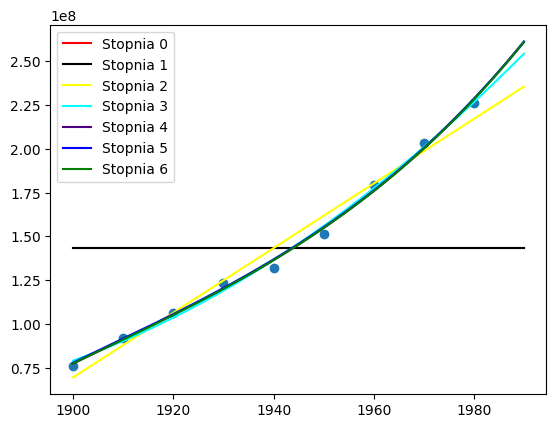

In [5]:
for i in range(0,m):
    k = i+1
    p_matrix = polynomial_matrix(years,i)
    coeff.append(np.linalg.lstsq(p_matrix,pop,rcond=-1)[0])
    y_vals = [horner(x,coeff[i-1]) for x in years]
    y_space = [horner(x,coeff[i-1]) for x in x_space]
    AICcs[i] = 2*k+n*np.log(sqdiff(pop,y_vals)/n)+2*k*(k+1)/(n-k-1)
    errors[i] = abs(real-horner(1990,coeff[i-1]))/real
    plt.plot(x_space,y_space,label="Stopnia "+str(i),color=color[i])
plt.scatter(years,pop)
plt.legend()

    